Notebook purpose

- Explore differences in savings behaviour

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import s3fs
import seaborn as sns

sys.path.append("/Users/fgu/dev/projects/entropy")
import entropy.data.cleaners as cl
import entropy.data.creators as cr
import entropy.data.txn_classifications as tc
import entropy.figures as figs
import entropy.helpers.aws as ha
import entropy.helpers.data as hd
import entropy.helpers.helpers as hh
from entropy import config

sns.set_style("whitegrid")
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)
pd.set_option("max_colwidth", None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

fs = s3fs.S3FileSystem(profile="3di")

In [2]:
dfs, dfl = hd.read_samples(["777", "XX7"])
hd.inspect(df)

Time for read_sample    : 1.85 seconds
Time for read_sample    : 4.98 minutes
(16,074,957, 31)


,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,updated_flag,ym,balance,income,entropy_sptac
0,1088993,2012-04-02,57,23.74,1982 01apr 12 the broadway fruiterer london gb,NaN,NaN,NaN,0.0,n8 9,2010-05-13,10k to 20k,1987.0,2016-10-30,273998,2015-08-15 21:37:00,natwest bank,current,2014-07-18,2017-10-23,True,NaN,NaN,NaN,NaN,NaN,u,201204,NaN,22542.600586,2.425209
1,1088994,2012-04-02,57,25.68,1982 01apr 12 waitrose 835 crouch end gb,waitrose,spend,household,0.0,n8 9,2010-05-13,10k to 20k,1987.0,2016-10-30,273998,2015-08-15 21:37:00,natwest bank,current,2014-07-18,2017-08-15,True,NaN,waitrose,"food, groceries, household",NaN,supermarket,u,201204,NaN,22542.600586,2.425209


In [3]:
filepath = "/Users/fgu/tmp/en/analysis_data_XX7.parquet"
dfa = ha.read_parquet(filepath)
hd.inspect(dfa)

(163,915, 23)


obs  balance_ca  balance_sa  sa_inflows  sa_outflows  \
user_id date                                                               
57      2012-04-30   66         0.0         NaN         NaN          NaN   
        2012-05-31   75         0.0         NaN         NaN          NaN   

                    sa_net_inflows  sa_scaled_inflows  sa_scaled_outflows  \
user_id date                                                                
57      2012-04-30             NaN                NaN                 NaN   
        2012-05-31             NaN                NaN                 NaN   

                    sa_scaled_net_inflows  total_monthly_spend  \
user_id date                                                     
57      2012-04-30                    NaN             6.784095   
        2012-05-31                    NaN             6.837290   

                    tag_spend_household  tag_spend_hobbies  tag_spend_retail  \
user_id date                                                                   
57      2012-04-30             0.400869           0.011305           0.00937   
        2012-05-31             0.469773           0.010719           0.00000   

                    tag_spend_services  tag_spend_other_spend  \
user_id date                                                    
57      2012-04-30            0.245824               0.067898   
        2012-05-31            0.317825              -0.014239   

                    tag_spend_finance  tag_spend_travel  \
user_id date                                              
57      2012-04-30           0.000837          0.228929   
        2012-05-31           0.001105          0.148343   

                    tag_spend_communication  tag_spend_motor  entropy_sptac  \
user_id date                                                                  
57      2012-04-30                 0.034967              0.0       2.425209   
        2012-05-31                 0.066473              0.0       2.363752   

                    log_income  user_female   age  
user_id date                                       
57      2012-04-30   10.023162          0.0  25.0  
        2012-05-31   10.023162          0.0  25.0

Look at:

- Inflows into savings accounts

- ISA payments

- Investment and pension payments

## Savings account inflows

Proportion of months in which users makes transfer into savings account

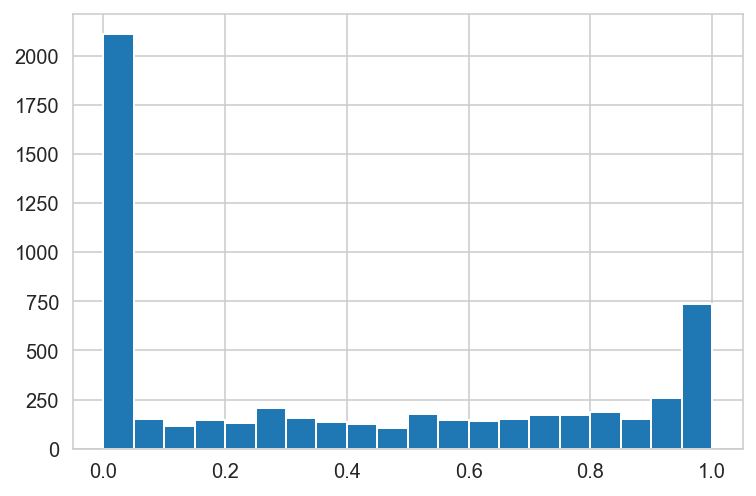

In [42]:
dfa.groupby("user_id").sa_inflows.agg([("txns", "count"), ("months", "size")]).assign(
    ratio=lambda df: df.txns / df.months
).ratio.hist(bins=20);